Les haremos/hicimos llegar por Discord un archivo con características de algunos miles de diamantes (`diamonds.csv`). Pueden encontrar información sobre el significado de cada columna en el README que acompaña al dataset.

1. Cargar el archivo como una `DataFrame` de `pandas`, asignado a una variable de nombre `df` ¿Hay que importar algún paquete para hacerlo?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Completar con el  lugar donde esté el archivo en su máquina (o Drive)
PATH_AL_ARCHIVO = 'datasets/diamonds.csv'
df = pd.read_csv(PATH_AL_ARCHIVO)

2. ¿Cuántas filas tiene el dataset? ¿Cuáles son las unidades de este conjunto de datos? En otras palabras, ¿de qué habla este dataset?

In [2]:
print("El dataset tiene {} filas. Las unidades son diamantes.".format(len(df)))

El dataset tiene 53940 filas. Las unidades son diamantes.


3. ¿Cuántas columnas tiene el dataset? ¿Corresponden todas a atributos de las unidades?

In [3]:
print("El dataset tiene {} columnas. Todas ellas corresponden a atributos de los diamantes".format(len(df.columns)))

El dataset tiene 10 columnas. Todas ellas corresponden a atributos de los diamantes


4. Describir a qué tipo pertenece cada una de las variables. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
print('El dataset tiene siete variables numéricas (carat, depth, table, price, x, y, z)\ny tres variables representadas como cadenas de caracteres (cut, color, clarity)')

El dataset tiene siete variables numéricas (carat, depth, table, price, x, y, z)
y tres variables representadas como cadenas de caracteres (cut, color, clarity)


Ahora vemos que las tres columnas aparecen como tipo "category".


5. Hay datos faltantes. ¿Cuántos y para qué variables?

In [6]:
print('De un análisis de la salida del método info, podemos ver que ninguna variable tiene datos faltantes')

De un análisis de la salida del método info, podemos ver que ninguna variable tiene datos faltantes


6. ¿Cuántos tipos de cortes (`cut`) existen? ¿Cuántos diamantes de cada tipo hay en el dataset?

In [7]:
print('Hay {} valores de la variable `cut`'.format(len(pd.unique(df.cut))))

df.cut.value_counts()

Hay 5 valores de la variable `cut`


cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

7. ¿Cuántos tipos de claridad (`clarity`) existen? ¿Cuántos diamantes de cada tipo hay en el dataset?

In [8]:
print('Hay {} valores de la variable `clarity`'.format(len(pd.unique(df.clarity))))

df.clarity.value_counts()

Hay 8 valores de la variable `clarity`


clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

8. ¿Cómo depende el valor medio del precio del tipo de corte?

In [9]:
df.groupby(by='cut').price.mean().round(2)

cut
Fair         4358.76
Good         3928.86
Ideal        3457.54
Premium      4584.26
Very Good    3981.76
Name: price, dtype: float64

In [10]:
# Reordenamos las categorías de esta variable según el orden del README
df.cut.reorder_levels

<bound method Series.reorder_levels of 0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: object>

9. Realizar un gráfico que permita ver esto.

<Axes: title={'center': 'Cambio del precio medio con el tipo de corte'}, xlabel='cut', ylabel='Precio medio [USD]'>

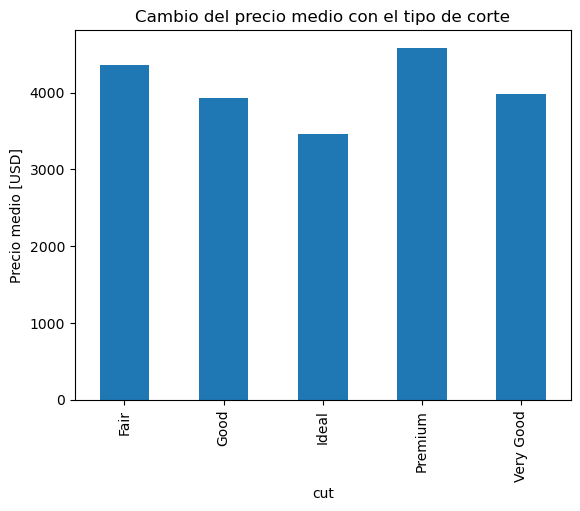

In [11]:
# Opción 1
df.groupby(by='cut').price.mean().plot(kind='bar',
                                       ylabel='Precio medio [USD]',
                                        title='Cambio del precio medio con el tipo de corte')

price    Axes(0.125,0.11;0.775x0.77)
dtype: object

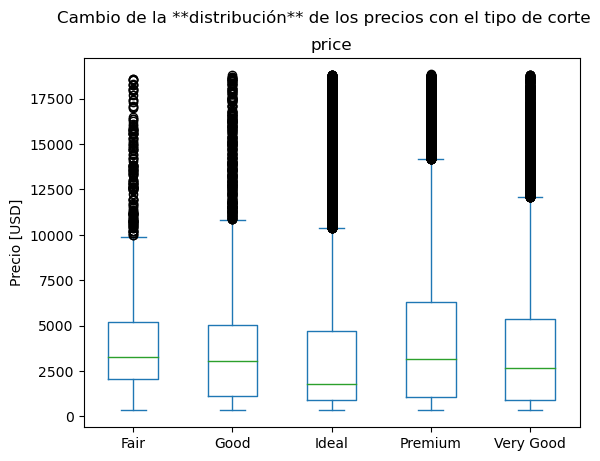

In [12]:
# Opción 2
df.plot(kind='box', by='cut', column='price',
        ylabel='Precio [USD]',
        title='Cambio de la **distribución** de los precios con el tipo de corte')

10. Calcular el coeficiente de correlación entre el precio y todas los demás atributos. ̉¿Qué atributo presenta un coeficiente mayor con el precio? Si no conociéramos el precio de los diamantes, ¿qué atributo permitiría obtener mayor información sobre el precio?

In [13]:
corr_price = df.corr(numeric_only=True).price
corr_price.abs().sort_values(ascending=False)

price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth    0.010647
Name: price, dtype: float64

In [14]:
print('La variable carat tiene una fuerte correlación con el precio. Podríamos usarla para predecir el precio de los diamantes.')

La variable carat tiene una fuerte correlación con el precio. Podríamos usarla para predecir el precio de los diamantes.


11. Graficar la matriz de correlación entre todos los parámetros y colorearla. Identificar grupos de variables que tienen fuerte correlación o cualquier otro patrón.

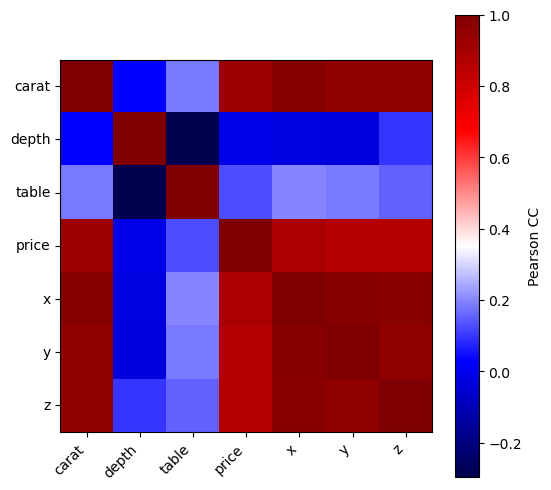

In [15]:
df_num = df.drop(columns=['cut', 'clarity', 'color'])
corr_matrix = df_num.corr()

# Todo lo que sigue es copiado y pegado (con adaptaciones) del notebook de clase.
plt.figure(figsize=(6,6))
plt.imshow(corr_matrix, cmap='seismic')

# Definir las marcaciones 
xt = plt.xticks(range(len(df_num.columns)), 
                df_num.columns, 
                rotation=45, ha='right', va='top')
yt = plt.yticks(range(len(df_num.columns)), 
                df_num.columns, 
                rotation=0, ha='right', va='center')

# Definir la barra de colores
plt.colorbar(label='Pearson CC')

In [16]:
print('Las variables depth y table están correlacionadas. Además, todas demás variables están correlacionads entre sí.')

print('Por otro lado, las variables price, carat, x e y tienen una anticorrelación con depth.')



Las variables depth y table están correlacionadas. Además, todas demás variables están correlacionads entre sí.
Por otro lado, las variables price, carat, x e y tienen una anticorrelación con depth.
